# Test 2 in iPython

The first step is to initialize the test and set some parameters. We then import the data from the test.  After changing the data from SI to MPa units, we can plot the force--displacement graph.

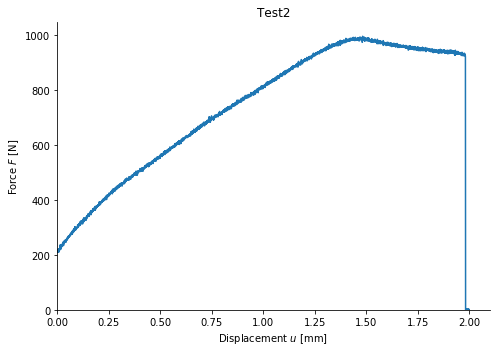

In [14]:
import pyZiagn
import warnings
warnings.filterwarnings('ignore')

Test2 = pyZiagn.uniaxialTensileTest(length0=30, Area0=30)
Test2.Title = "Test2"
Test2.importTestData("data/Example2.txt")
Test2.changeUnits()
Test2.plotForceDisp()

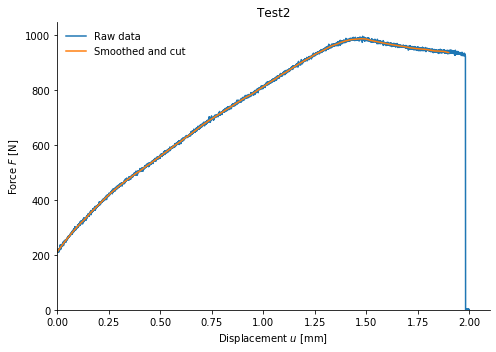

In [3]:
Test2.cutData("disp", 1.90)
Test2.smoothForce()
Test2.plotForceDispSmoothRaw()

We see though that we have cut too much. We now recut at 1.97 mm and resmooth. 

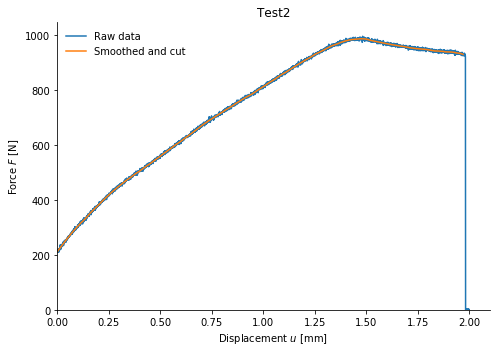

In [4]:
Test2.resetCutData()
Test2.cutData("disp", 1.97)
Test2.smoothForce()
Test2.plotForceDispSmoothRaw()

We see that the cut is proper and we can now continue with the calculation of our material properties. We begin with engineering stress and strain.

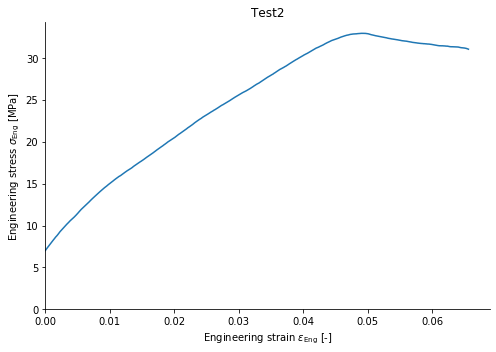

In [5]:
Test2.calcStressEng()
Test2.calcStrainEng()
Test2.plotStressStrainEng()

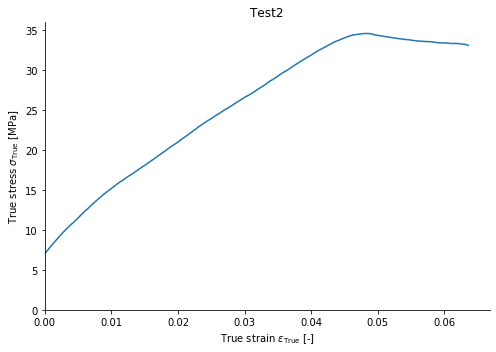

In [6]:
Test2.calcStressTrue()
Test2.calcStrainTrue()
Test2.plotStressStrainTrue()

We can also compare the true and engineering stress-strain curves.

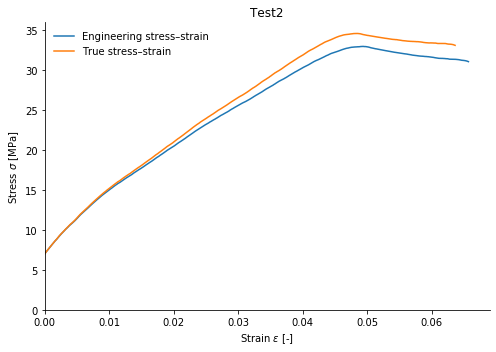

In [7]:
Test2.plotStressStrainEngTrue()

We can now choose two strains (engineering) inbetween which the Young's modulus will be calculated. 

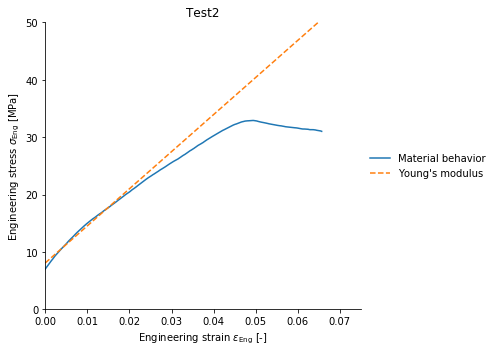

In [8]:
Test2.calcElasticModulus(strain0=0.0001, strain1=0.02)
Test2.plotStressStrainEngYoungs()

It is clear to see that these were poorly choosen values and that this must be done again. 

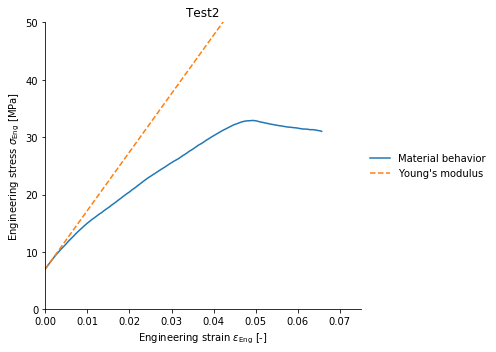

In [9]:
Test2.calcElasticModulus(strain0=0.0001, strain1=0.001)
Test2.plotStressStrainEngYoungs()

We can also zoom in on the elastic part to verify that the strains choosen are proper. 

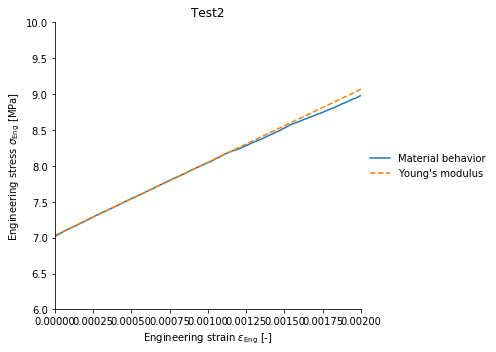

In [10]:
Test2.plotStressStrainEngYoungs(strainMax=0.002, stressMin=6, stressMax=10)

We can see that in the region of strains that were considered, that the elastic modulus remains linear, i.e. that the choice was proper. 

We can now zero out the strain that was residual in the probe due to the clamping in the testing machine. 

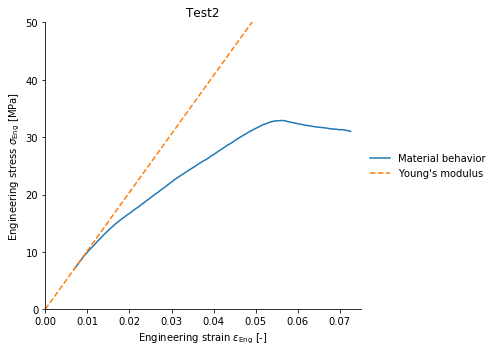

In [11]:
Test2.zeroStrain()
Test2.plotStressStrainEngYoungs()

From the Young's modulus we can calculate now the 0.2% offset and then the $R_{P0.2}$ strength. We will also approximate where the measured data stops being linear. 

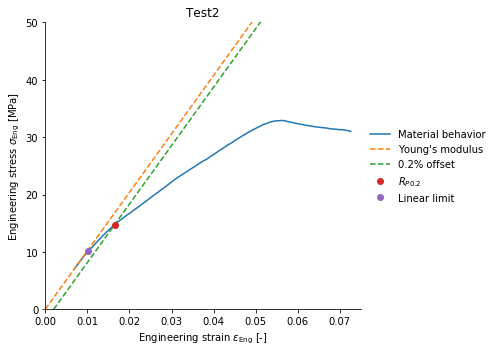

In [12]:
Test2.calcRp02()
Test2.calcLinearLimit()
Test2.plotStressStrainEngRP02()

We can then also add ultimate strength and break to our plot. 

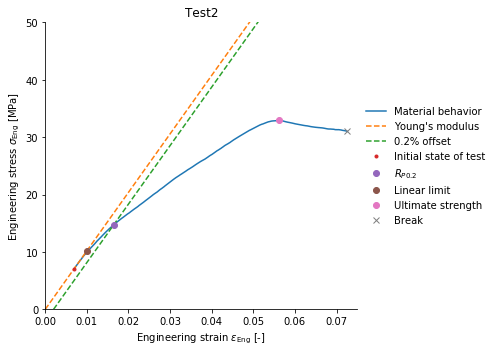

In [13]:
Test2.calcStressUltimate()
Test2.plotStressStrainEngAll()